<a href="https://colab.research.google.com/github/06081990/Clustering-Algorithms/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycaret

  Using cached pycaret-3.3.0-py3-none-any.whl (485 kB)
  Using cached scikit_learn-1.4.1.post1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.1 MB)
  Using cached pyod-1.1.3.tar.gz (160 kB)
  Preparing metadata (setup.py) ... done
  Using cached imbalanced_learn-0.12.0-py3-none-any.whl (257 kB)
  Using cached category_encoders-2.6.3-py2.py3-none-any.whl (81 kB)
  Using cached deprecation-2.1.0-py2.py3-none-any.whl (11 kB)
  Using cached scikit_plot-0.3.7-py3-none-any.whl (33 kB)
  Using cached kaleido-0.2.1-py2.py3-none-manylinux1_x86_64.whl (79.9 MB)
  Using cached schemdraw-0.15-py3-none-any.whl (106 kB)
  Using cached plotly_resampler-0.9.2-py3-none-any.whl (81 kB)
  Using cached sktime-0.26.0-py3-none-any.whl (21.8 MB)
  Using cached tbats-1.1.3-py3-none-any.whl (44 kB)
  Using cached pmdarima-2.0.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl (2.1 MB)
  Using cached wurlitzer-3.0.3-py3-none-any.whl (7.3 kB)
     ━━━━━━━━━━━━━━━━━

In [ ]:
import pycaret

In [ ]:
pycaret.__version__

'3.3.0'

In [ ]:
#setup --> create model --> Assign labels --> Analyze the model --> Predictions --> save the model

In [ ]:
from  pycaret.datasets import get_data

In [ ]:
data = get_data("jewellery")

,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130


In [ ]:
# import clustering and initsetup
from pycaret.clustering import *

In [ ]:
s = setup(data,session_id=123)

,Description,Value
0,Session id,123
1,Original data shape,"(505, 4)"
2,Transformed data shape,"(505, 4)"
3,Numeric features,4
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


In [ ]:
from pycaret.clustering import ClusteringExperiment

In [ ]:
# create model
kmeans = create_model("kmeans",num_clusters=3)


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7393,3567.5370,0.3435,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch


In [ ]:
meanshift = create_model('meanshift')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7393,3567.5370,0.3435,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
# create cluster(Assign labels)
KMeans_cluster = assign_model(kmeans)
KMeans_cluster

,Age,Income,SpendingScore,Savings,Cluster
0,58,77769,0.791329,6559.830078,Cluster 2
1,59,81799,0.791082,5417.661621,Cluster 2
2,62,74751,0.702657,9258.993164,Cluster 2
3,59,74373,0.765680,7346.334473,Cluster 2
4,87,17760,0.348778,16869.507812,Cluster 1
...,...,...,...,...,...
500,28,101206,0.387441,14936.775391,Cluster 0
501,93,19934,0.203140,17969.693359,Cluster 1
502,90,35297,0.355149,16091.402344,Cluster 1
503,91,20681,0.354679,18401.087891,Cluster 1


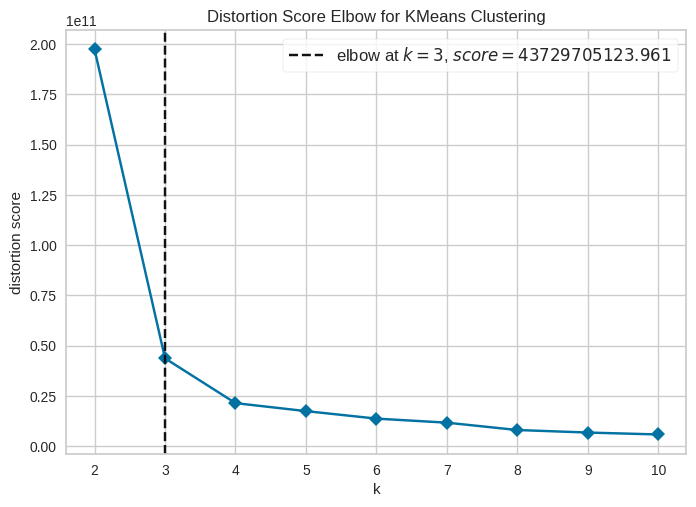

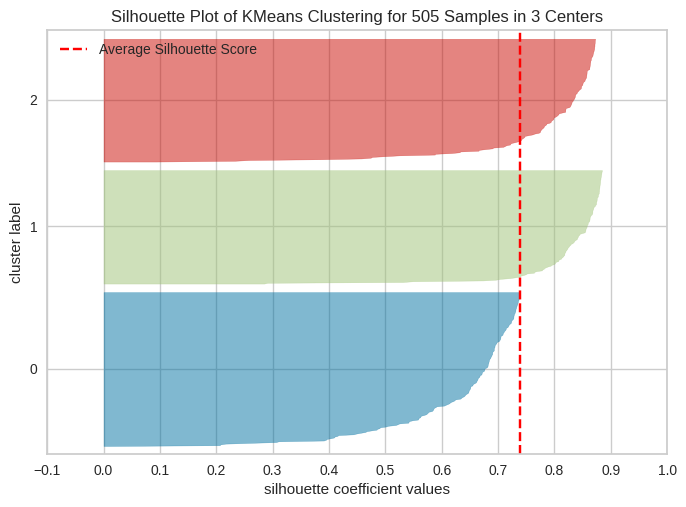

In [ ]:
#Analyze the model
plot_model(kmeans,plot = 'cluster')
plot_model(kmeans,plot = 'elbow')
plot_model(kmeans,plot = 'silhouette')

In [ ]:
#Evaluate model
evaluate_model(kmeans)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
#Predict Model
Kmeans_pred = predict_model(kmeans , data=data)
Kmeans_pred

,Age,Income,SpendingScore,Savings,Cluster
0,58.0,77769.0,0.791329,6559.829923,Cluster 2
1,59.0,81799.0,0.791082,5417.661426,Cluster 2
2,62.0,74751.0,0.702657,9258.992965,Cluster 2
3,59.0,74373.0,0.765680,7346.334504,Cluster 2
4,87.0,17760.0,0.348778,16869.507130,Cluster 1
...,...,...,...,...,...
500,28.0,101206.0,0.387441,14936.775389,Cluster 0
501,93.0,19934.0,0.203140,17969.693769,Cluster 1
502,90.0,35297.0,0.355149,16091.401954,Cluster 1
503,91.0,20681.0,0.354679,18401.088445,Cluster 1
